In [95]:
from backtesting import Backtest, Strategy
from backtesting.lib import crossover
from backtesting.test import SMA
import yfinance as yf
import pandas_ta as ta
import pandas as pd

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt

In [97]:
tickerSymbol = 'BTC-USD'
tickerData = yf.Ticker(tickerSymbol)
#start='2016-07-09'
df = tickerData.history(period='1d', start='2016-07-09', end='2023-06-26')

In [100]:
df['RSI'] = ta.rsi(df['Close'])
df.dropna(inplace = True)

In [101]:
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,RSI
Date,,,,,,,,
2016-07-23 00:00:00+00:00,650.726013,656.366028,648.523987,655.556030,69532200,0.0,0.0,47.748334
2016-07-24 00:00:00+00:00,655.409973,663.109985,652.793030,661.284973,118184000,0.0,0.0,52.550260
2016-07-25 00:00:00+00:00,661.263000,661.828003,653.395020,654.096985,78176496,0.0,0.0,46.745638
2016-07-26 00:00:00+00:00,654.226013,656.224976,645.879028,651.783997,225135008,0.0,0.0,45.022273
2016-07-27 00:00:00+00:00,651.627014,657.455994,648.447021,654.351990,147460992,0.0,0.0,47.343375
...,...,...,...,...,...,...,...,...
2023-06-21 00:00:00+00:00,28311.310547,30737.330078,28283.410156,30027.296875,33346760979,0.0,0.0,70.696114
2023-06-22 00:00:00+00:00,29995.935547,30495.998047,29679.158203,29912.281250,20653160491,0.0,0.0,69.628659
2023-06-23 00:00:00+00:00,29896.382812,31389.539062,29845.214844,30695.468750,24115570085,0.0,0.0,72.656304


In [20]:
# 18.089368
# class SMARsiStrategy(Strategy):
#     def init(self):
#         self.rsi = self.I(lambda x: x, self.data.RSI)
#         self.sma = self.I(SMA, self.data.Close, 20)

#     def next(self):
#         if crossover(self.data.Close, self.sma) and (self.rsi < 40):
#             self.buy()
#         elif crossover(self.sma, self.data.Close) and (self.rsi > 60):
#             self.position.close()


# backtest = Backtest(df, SMARsiStrategy, commission=0.02, exclusive_orders=True)

C:\Users\lapek\AppData\Local\Temp/ipykernel_11440/1923823881.py:14: UserWarning: Some prices are larger than initial cash value. Note that fractional trading is not supported. If you want to trade Bitcoin, increase initial cash, or trade μBTC or satoshis instead (GH-134).
  backtest = Backtest(df, SMARsiStrategy, commission=0.02, exclusive_orders=True)


In [83]:
# #ann 47%

class MySMAStrategy(Strategy):
    
    
    def init(self):
        price = self.data.Close
        self.ma1 = self.I(SMA, price, 10)
        self.ma2 = self.I(SMA, price, 20)
        
    def next(self):
        if crossover(self.ma1, self.ma2):
            self.buy()
        elif crossover(self.ma2, self.ma1):
            self.position.close()


backtest = Backtest(df, MySMAStrategy, commission = 0.02, cash = 10000, exclusive_orders = True)

stats = backtest.run()
print(stats)

Start                     2016-07-23 00:00...
End                       2023-06-25 00:00...
Duration                   2528 days 00:00:00
Exposure Time [%]                   58.956109
Equity Final [$]                150888.908077
Equity Peak [$]                 762156.782374
Return [%]                        1408.889081
Buy & Hold Return [%]             4549.528082
Return (Ann.) [%]                    47.94854
Volatility (Ann.) [%]               82.101777
Sharpe Ratio                         0.584013
Sortino Ratio                        1.405971
Calmar Ratio                         0.594415
Max. Drawdown [%]                  -80.665055
Avg. Drawdown [%]                   -9.186234
Max. Drawdown Duration      854 days 00:00:00
Avg. Drawdown Duration       49 days 00:00:00
# Trades                                   63
Win Rate [%]                        34.920635
Best Trade [%]                     176.478753
Worst Trade [%]                    -22.498803
Avg. Trade [%]                    

C:\Users\lapek\AppData\Local\Temp/ipykernel_4568/198928136.py:18: UserWarning: Some prices are larger than initial cash value. Note that fractional trading is not supported. If you want to trade Bitcoin, increase initial cash, or trade μBTC or satoshis instead (GH-134).
  backtest = Backtest(df, MySMAStrategy, commission = 0.02, cash = 10000, exclusive_orders = True)


In [105]:
#19

def n_trades(series):
    
#     if series['# Trades'] < 15:
#         return -1
#     else:
#         return 1
    return series['Return [%]']
    
    
class RsiStrategy(Strategy):
    
    upper = None
    lower = None
    
    def init(self):
        self.rsi = self.I(lambda x: x, self.data.RSI)

    def next(self):
        if crossover(self.rsi, self.upper):
            self.position.close()
        elif crossover(self.lower, self.rsi):
            self.buy()


backtest = Backtest(df, RsiStrategy, commission=0.02, cash = 10000, exclusive_orders=True)

stats, heatmap = backtest.optimize(upper = range(65, 85, 5),
                          lower = range(10, 40, 5),
                          maximize = n_trades,
                          return_heatmap = True)
# stats, heatmap = backtest.optimize(upper = range(65, 80, 5),
#                           lower = range(25, 45, 5),
print(stats)

heatmap = heatmap.groupby(['upper', 'lower']).mean().unstack()

print(heatmap)

C:\Users\lapek\AppData\Local\Temp/ipykernel_4568/1669591301.py:27: UserWarning: Some prices are larger than initial cash value. Note that fractional trading is not supported. If you want to trade Bitcoin, increase initial cash, or trade μBTC or satoshis instead (GH-134).
  backtest = Backtest(df, RsiStrategy, commission=0.02, cash = 10000, exclusive_orders=True)


  0%|          | 0/8 [00:00<?, ?it/s]

Start                     2016-07-23 00:00...
End                       2023-06-25 00:00...
Duration                   2528 days 00:00:00
Exposure Time [%]                   25.860024
Equity Final [$]                 33257.986603
Equity Peak [$]                  33257.986603
Return [%]                         232.579866
Buy & Hold Return [%]             4549.528082
Return (Ann.) [%]                   18.938666
Volatility (Ann.) [%]               38.174501
Sharpe Ratio                         0.496108
Sortino Ratio                        0.992596
Calmar Ratio                         0.336667
Max. Drawdown [%]                  -56.253409
Avg. Drawdown [%]                   -8.508998
Max. Drawdown Duration     1834 days 00:00:00
Avg. Drawdown Duration      150 days 00:00:00
# Trades                                   28
Win Rate [%]                        42.857143
Best Trade [%]                      71.890335
Worst Trade [%]                    -31.216001
Avg. Trade [%]                    

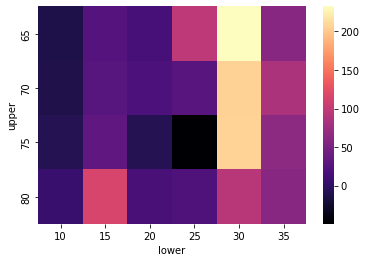

In [106]:
sns.heatmap(heatmap, cmap = 'magma')
plt.show()

In [107]:
backtest.plot()

Row(id='5376', ...)